In [21]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nibabel as nib

# DATASET

## .nii & glm.nii

In [4]:
nib.Nifti1Header.quaternion_threshold = -1e-06  # https://github.com/nipy/nibabel/issues/626

filename = "./Dataset/Training/Data/1000_3.nii"
img = nib.load(filename)

In [5]:
img.shape

(256, 256, 287)

In [6]:
filename = "./Dataset/Training/Data/1000_3_glm.nii"
nib.Nifti1Header.quaternion_threshold = -1e-06  # https://github.com/nipy/nibabel/issues/626
img_glm = nib.load(filename)

In [7]:
img_glm.shape

(256, 256, 287)

In [8]:
# nii image -> np array
a = np.array(img.dataobj)
b = np.array(img_glm.dataobj)

In [9]:
a[140][140]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         22,   90,  145,  237,  199,  205,  195,  173,  224,  219,  224,
        260,  747, 1182, 1302, 1625, 1771, 2484, 2561, 1871, 1222,  695,
        346,  360,  480,  492,  437,  569,  770,  964, 1090, 1165, 1112,
       1045,  743,  589,  772,  905,  955,  992,  982,  979,  916,  801,
        753,  877, 1027, 1216, 1428, 1523, 1543, 1554, 1549, 1565, 1558,
       1531, 1543, 1502, 1367, 1219, 1106,  972,  902,  965,  970,  937,
       1000, 1096, 1242, 1382, 1517, 1596, 1583, 1569, 1538, 1473, 1434,
       1407, 1501, 1530, 1503, 1531, 1532, 1519, 1520, 1537, 1537, 1558,
       1503, 1385, 1276, 1182, 1076, 1113, 1251, 1457, 1449, 1412, 1306,
       1290, 1248, 1166, 1222, 1220, 1236, 1281, 1323, 1262, 1201, 1140,
       1151, 1128, 1124, 1103, 1024, 1238, 1320, 1485, 1585, 1649, 1629,
       1648, 1689, 1679, 1480, 1336, 1363, 1256, 12

In [23]:
b[140][140]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129,  45,  45,  45,  45,  45,  45,  45,  45,  45,
        45,  45,  45,  45, 129, 129, 129, 129, 123, 123, 123, 123,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45, 171, 171, 171,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  48,
        48,  45,  45,  45,  45,  45,  50,  50,  45,  45,  45,  45,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,
        45,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0, 179, 179,
       179, 179, 179,  45,  45,  45,  45,  45,  45,  45,  45, 17

## Image

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(a[100])
ax[1].imshow(b[100])

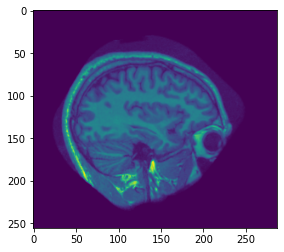

In [12]:
imgplot = plt.imshow(a[140])

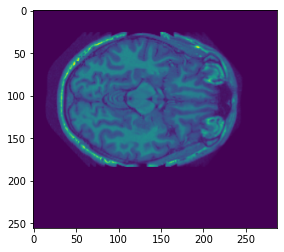

In [13]:
imgplot = plt.imshow(a[:,140])

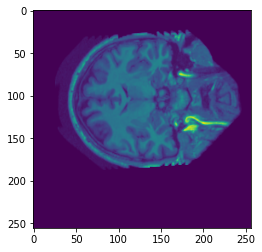

In [24]:
imgplot = plt.imshow(a[:, :, 140])

## .xml

In [15]:
import xml.etree.ElementTree as elemTree

In [16]:
tree = elemTree.parse('./Dataset/Training/Data/1000_3_glm_LabelMap.xml')

label_list = []
for l in tree.findall('Label'):
    rgb_list = l.find('RGBColor').text.split(" ")
    label_dic = {
        "name" : l.find('Name').text,
        "Number" : int(l.find('Number').text),
        "r" : rgb_list[0],
        "g" : rgb_list[1],
        "b" : rgb_list[2],
    }
    label_list.append(label_dic)

In [18]:
label_df = pd.DataFrame(label_list)
label_df

,name,Number,r,g,b
0,3rd Ventricle,4,204,182,142
1,4th Ventricle,11,42,204,164
2,5th Ventricle,15,120,190,150
3,Basal Forebrain,70,255,255,255
4,Brain Stem,35,119,159,176
...,...,...,...,...,...
196,superior_frontal,28,255,62,150
197,superior_rostral,84,0,206,209
198,superior_temporal,29,255,0,0
199,superior_vermal_sulcus,89,102,153,49


In [19]:
label_df["Number"].max()

207

In [20]:
b.max()

207